# Bar Chart Race | Animated bar chart races in Python with matplotlib

https://www.dexplo.org/bar_chart_race/

In this tutorial, we'll learn how to create a bar chart race animation such as the demo shows below using the matplotlib data visualization library in python. This is a step - by- step tutorial of the package.

## What is a bar chart race?

A bar chart race is an animated sequence of bars that show data values at different moments in time. The bars re-position themselves at each time period so that they remain in order (either ascending or descending). The trick to make a bar chart race is to transition the bars slowly to their new position when their order changes, allowing us to easily track the movements

### COVID-19 deaths data

For this bar chart race, we'll use a small example dataset produced by John Hopkins University containing the total deaths by date for six countries during the currently ongoing coronavirus pandemic. Let's read it in now.

In [1]:
#install package 'bar_chart_race'
pip install bar_chart_race 

In [2]:
# import package
import bar_chart_race as bcr

In [3]:
import pandas as pd
df = bcr.load_dataset('covid19_tutorial')
df

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385
2020-04-07,2035,3335,10343,2016,3872,17127,2108,14045,12798,6171
2020-04-08,2240,3337,10887,2349,3993,17669,2255,14792,14704,7111
2020-04-09,2523,3339,12228,2607,4110,18279,2403,15447,16553,7993
2020-04-10,3019,3340,13215,2767,4232,18849,2520,16081,18595,8974
2020-04-11,3346,3343,13851,2894,4357,19468,2653,16606,20471,9892


We need to prepare our data in 'wide' form where:

- Every row represents a single period of time 
- Each column holds the value for a particular category
- The index contains the time component (optional)


Let's begin by creating a single static bar chart for the specific date of 2020-04-03.   
First, we select the data as a Series.

In [4]:
s = df.loc['2020-04-03']
s

Belgium            1143
China              3326
France             6520
Germany            1275
Iran               3294
Italy             14681
Netherlands        1490
Spain             11198
USA                7418
United Kingdom     3611
Name: 2020-04-03 00:00:00, dtype: int64

We'll make a horizontal bar chart with matplotlib using the country names as the y-values and total deaths as the x-values (width of bars). Every bar will be a different color from the 'Dark2' colormap.

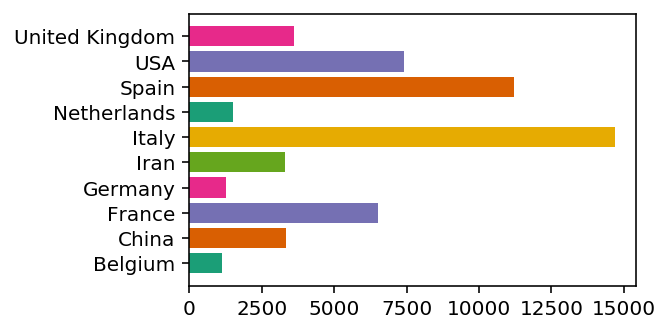

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144) # set subplot sizes and format
colors = plt.cm.Dark2(range(6)) # so that each bar has different color
y = s.index
width = s.values

# this is the function we use to make a horizontal bar plot
ax.barh(y=y, width=width, color=colors); 

(optional)The function below changes several properties of the axes to make it look nicer.

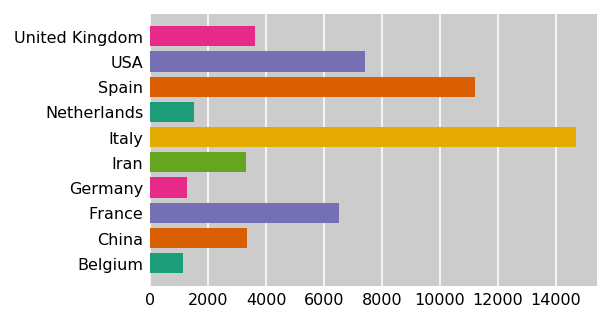

In [6]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

### Plot three consecutive days ordering the bars 

For a bar chart race, the bars are often ordered from largest to smallest with the largest at the top. Here, we plot three days of data sorting each one first.

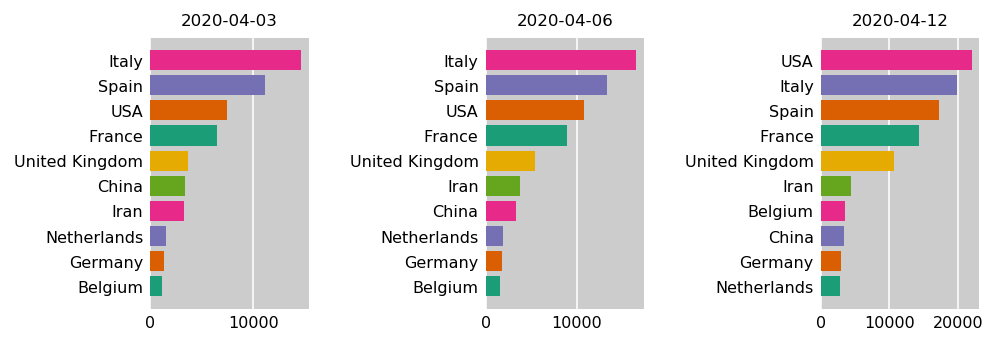

In [7]:
# subplots format
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), 
                             dpi=144, tight_layout=True)
# choose any dates we want to visualize
dates = ['2020-04-03', '2020-04-06', '2020-04-12']
#for loop to plot data from each date 
for ax, date in zip(ax_array, dates):
    s = df.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

Although the bars are ordered properly, the countries **do not** keep their original color when changing places in the graph. Notice that *Italy* on *2020-04-06* begins as the 1st bar and moves down one position on *2020-04-12*, changing from its original pink to purple.

Instead of sorting, we use the `rank` method to find the numeric ranking of each country for each day. We use the "first" method of ranking so that each numeric rank is a unique integer. By default, the method is "average" which ranks ties with the same value causing overlapping bars. Let's see the ranking for the 2020-04-03.

In [8]:
df.loc['2020-04-03'].rank(method='first')

Belgium            1.0
China              5.0
France             7.0
Germany            2.0
Iran               4.0
Italy             10.0
Netherlands        3.0
Spain              9.0
USA                8.0
United Kingdom     6.0
Name: 2020-04-03 00:00:00, dtype: float64

We now use this rank as the y-values. The order of the data in the Series never changes this way, ensuring that countries remain the same color regardless of their rank.

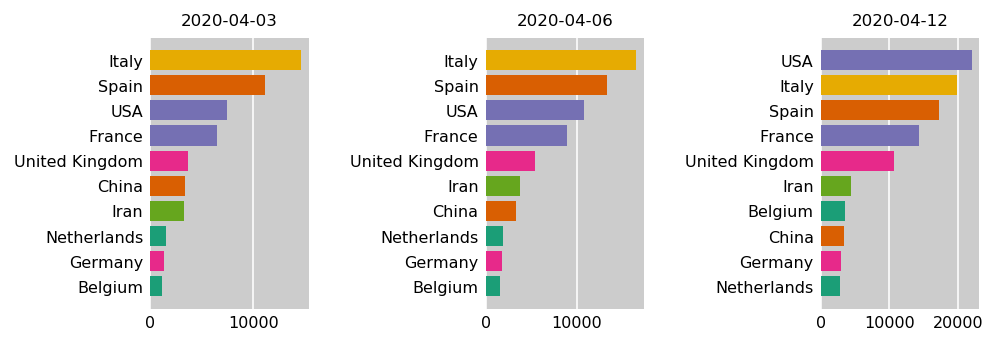

In [9]:
#set subplots formats
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), 
                             dpi=144, tight_layout=True)
#choose any dates we want
dates = ['2020-04-03', '2020-04-06', '2020-04-12']
#for loop to plot data from each date 
for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first')
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

### How to smoothly transition?

Using each day as a single frame in an animation won't work well as it doesn't capture the transition from one time period to the next. In order to transition the bars that change positions, we'll need to add extra rows of data between the dates that we do have. Let's first select the three dates above as a DataFrame.

In [10]:
df2 = df.loc['2020-04-03':'2020-04-06']
df2

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385


It's easier to insert an exact number of new rows when using the default index - integers beginning at 0. Use the `reset_index` method to get a default index and to place the dates as a column again.

In [11]:
#get a default index and to place the dates as a column again
df2 = df.reset_index()
df2

,date,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
0,2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
1,2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
2,2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
3,2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385
4,2020-04-07,2035,3335,10343,2016,3872,17127,2108,14045,12798,6171
5,2020-04-08,2240,3337,10887,2349,3993,17669,2255,14792,14704,7111
6,2020-04-09,2523,3339,12228,2607,4110,18279,2403,15447,16553,7993
7,2020-04-10,3019,3340,13215,2767,4232,18849,2520,16081,18595,8974
8,2020-04-11,3346,3343,13851,2894,4357,19468,2653,16606,20471,9892
9,2020-04-12,3600,3343,14412,3022,4474,19899,2747,17209,22032,10629


We want to insert new rows between the first and second rows and between the second and third rows. Begin by multiplying the index by the number of steps to transition from one time period to the next. We use 5 in this example.

In [12]:
df2.index = df2.index * 5
df2

,date,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
0,2020-04-03,1143,3326,6520,1275,3294,14681,1490,11198,7418,3611
5,2020-04-04,1283,3330,7574,1444,3452,15362,1656,11947,8387,4320
10,2020-04-05,1447,3333,8093,1584,3603,15887,1771,12641,9489,4943
15,2020-04-06,1632,3335,8926,1810,3739,16523,1874,13341,10783,5385
20,2020-04-07,2035,3335,10343,2016,3872,17127,2108,14045,12798,6171
25,2020-04-08,2240,3337,10887,2349,3993,17669,2255,14792,14704,7111
30,2020-04-09,2523,3339,12228,2607,4110,18279,2403,15447,16553,7993
35,2020-04-10,3019,3340,13215,2767,4232,18849,2520,16081,18595,8974
40,2020-04-11,3346,3343,13851,2894,4357,19468,2653,16606,20471,9892
45,2020-04-12,3600,3343,14412,3022,4474,19899,2747,17209,22032,10629


To insert the additional rows, pass the reindex method a sequence of all integers beginning at 0 to the last integer (10 in this case). Pandas inserts new rows of all missing values for every index not in the current DataFrame.

In [13]:
last_idx = df2.index[-1] + 1
#expand our DataFrame using reindex function
df_expanded = df2.reindex(range(last_idx))
df_expanded.head(8)

,date,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
0,2020-04-03,1143.0,3326.0,6520.0,1275.0,3294.0,14681.0,1490.0,11198.0,7418.0,3611.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-04-04,1283.0,3330.0,7574.0,1444.0,3452.0,15362.0,1656.0,11947.0,8387.0,4320.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice that there are NaN values when we expand the original DataFrame. The date for the missing rows is the same for each. Let's fill them in using the last known value with the `fillna` method and set it as the index again.

In [14]:
# forward fill
df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('date')
df_expanded.head(8)

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143.0,3326.0,6520.0,1275.0,3294.0,14681.0,1490.0,11198.0,7418.0,3611.0
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,1283.0,3330.0,7574.0,1444.0,3452.0,15362.0,1656.0,11947.0,8387.0,4320.0
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also need a similar DataFrame that contains the rank of each country by row. Most pandas methods work down each column by default. Set axis to 1 to change the direction of the operation so that values in each row are ranked against each other.

In [16]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1.0,5.0,7.0,2.0,4.0,10.0,3.0,9.0,8.0,6.0
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `interpolate` method can fill in the missing values in a variety of ways. By default, it uses linear interpolation and works column-wise.

In [17]:
df_expanded = df_expanded.interpolate()
df_expanded.head(8)

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1143.0,3326.0,6520.0,1275.0,3294.0,14681.0,1490.0,11198.0,7418.0,3611.0
2020-04-03,1171.0,3326.8,6730.8,1308.8,3325.6,14817.2,1523.2,11347.8,7611.8,3752.8
2020-04-03,1199.0,3327.6,6941.6,1342.6,3357.2,14953.4,1556.4,11497.6,7805.6,3894.6
2020-04-03,1227.0,3328.4,7152.4,1376.4,3388.8,15089.6,1589.6,11647.4,7999.4,4036.4
2020-04-03,1255.0,3329.2,7363.2,1410.2,3420.4,15225.8,1622.8,11797.2,8193.2,4178.2
2020-04-04,1283.0,3330.0,7574.0,1444.0,3452.0,15362.0,1656.0,11947.0,8387.0,4320.0
2020-04-04,1315.8,3330.6,7677.8,1472.0,3482.2,15467.0,1679.0,12085.8,8607.4,4444.6
2020-04-04,1348.6,3331.2,7781.6,1500.0,3512.4,15572.0,1702.0,12224.6,8827.8,4569.2


We also need to interpolate the ranking.

In [18]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded.head(8)

,Belgium,China,France,Germany,Iran,Italy,Netherlands,Spain,USA,United Kingdom
date,,,,,,,,,,
2020-04-03,1.0,5.0,7.0,2.0,4.0,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.8,7.0,2.0,4.2,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.6,7.0,2.0,4.4,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.4,7.0,2.0,4.6,10.0,3.0,9.0,8.0,6.0
2020-04-03,1.0,4.2,7.0,2.0,4.8,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0
2020-04-04,1.0,4.0,7.0,2.0,5.0,10.0,3.0,9.0,8.0,6.0


### Plot each step of the transition

The interpolated ranks will serve as the new position of the bars along the y-axis. Here, we'll plot each step from the first to the second day.

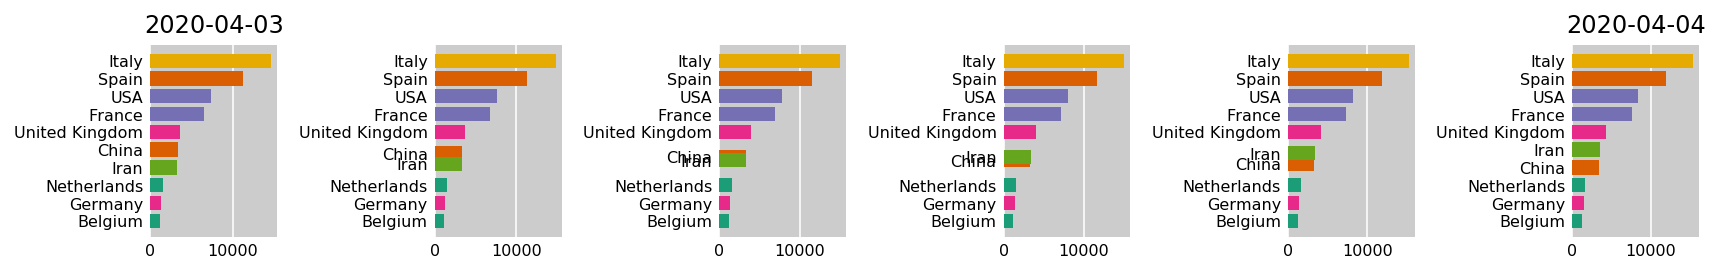

In [20]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-04-03')
ax_array[-1].set_title('2020-04-04');

The next day's transition is plotted below.

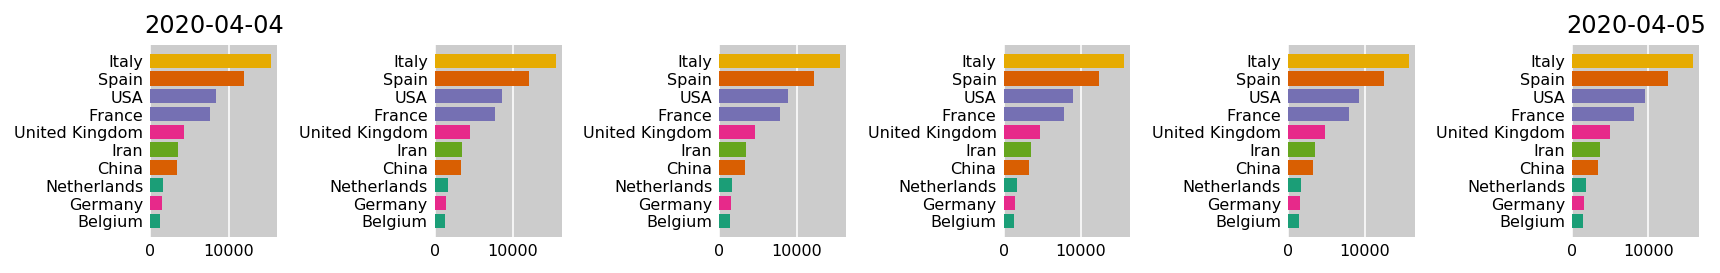

In [21]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-04-04')
ax_array[-1].set_title('2020-04-05');

### Animation

We are now ready to create the animation. Each row represents a single frame in our animation and will slowly transition the bars y-value location and width from one day to the next.

The simplest way to do animation in matplotlib is to use `FuncAnimation`. We need to define a function that updates the matplotlib axes object each frame. Because the axes object keeps all of the previous bars, we remove them in the beginning of the update function. The rest of the function is identical to the plotting from above. This function will be passed the index of the frame as an integer. We also set the title to have the current date.

Optionally, we can define a function that initializes the axes. Below, `init` clears the previous axes of all objects and then resets its nice properties.

Pass the figure (containing your axes), the update and init functions, and number of frames to `FuncAnimation`. We also pass the number of milliseconds between each frame. We use 100 milliseconds per frame equating to 500 per day (half of a second).

The figure and axes are created separately below so they do not get output in a Jupyter Notebook, which automatically happens if you call `plt.subplots`.

In [22]:
from matplotlib.animation import FuncAnimation

# this function clears the previous axes of all objects and then resets its nice properties
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

# this function updates the matplotlib axes object each frame    
def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

### Return animation HTML

Leave the filename parameter as None to return the animation as HTML.

In [27]:
bcr_html = bcr.bar_chart_race(df=df_expanded, filename=None)
from IPython.display import HTML
HTML(bcr_html)